
# Bike Sharing Demand Prediction 🚲
**Author:** Neelansh Goyal

In this project, we aim to predict the bike-sharing demand based on historical usage patterns and weather conditions.  
We apply and compare multiple machine learning models to achieve optimal performance.

---


In [44]:

# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [22]:
# --- Load Dataset ---
data = pd.read_csv('BikeSharing.csv')

# Preview the dataset
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,02-01-2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,03-01-2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,04-01-2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,05-01-2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [24]:
# --- Data Exploration ---
print("Dataset Shape:", data.shape)
print("\nDataset Info:")
data.info()

Dataset Shape: (731, 16)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [26]:
# Check missing values
print("\nMissing Values:\n", data.isnull().sum())


Missing Values:
 instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


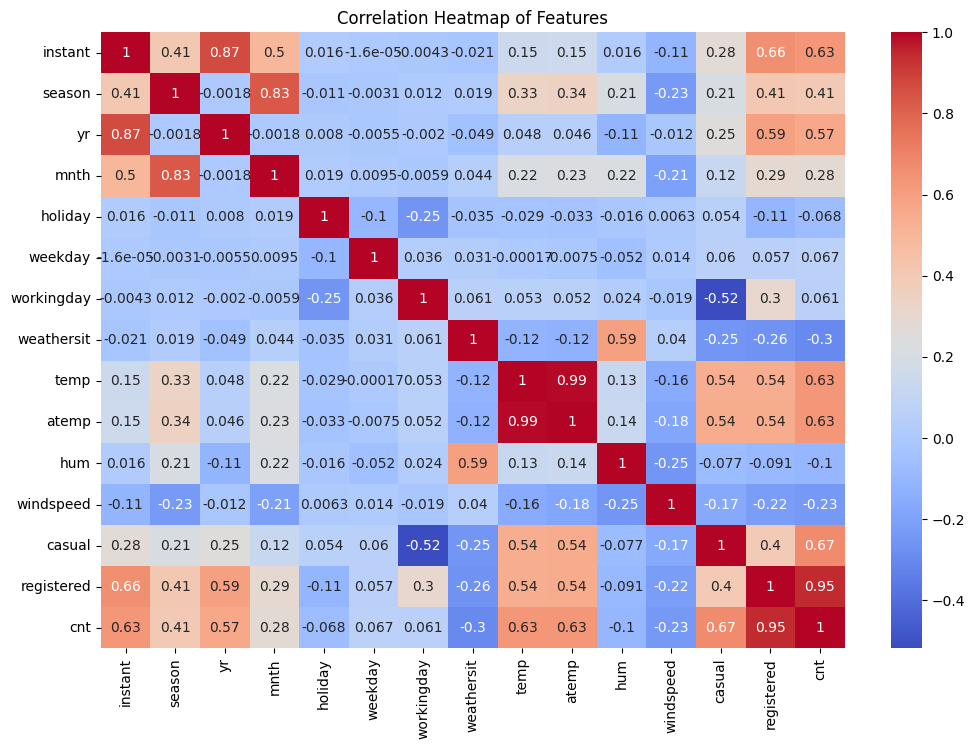

In [30]:
# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(data.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Features')
plt.show()

In [32]:
# --- Feature Selection ---
features = data.drop(columns=['instant', 'dteday', 'casual', 'registered', 'cnt'])
target = data['cnt']

In [36]:
# --- Train-Test Split ---
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [38]:
# Model 1: Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Linear Regression Performance:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("R^2 Score:", r2_score(y_test, y_pred_lr))

Linear Regression Performance:
RMSE: 831.2851545662686
R^2 Score: 0.8276670090367212


In [40]:
# Model 2: Random Forest Regressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\nRandom Forest Regressor Performance:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R^2 Score:", r2_score(y_test, y_pred_rf))


Random Forest Regressor Performance:
RMSE: 677.0871048743101
R^2 Score: 0.8856707218333267


In [46]:
# Model 3: Ridge Regression

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

print("\nRidge Regression Performance:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))
print("R^2 Score:", r2_score(y_test, y_pred_ridge))


Ridge Regression Performance:
RMSE: 842.5229573060536
R^2 Score: 0.8229761168778599


In [48]:
# Model 4: Lasso Regression

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

print("\nLasso Regression Performance:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lasso)))
print("R^2 Score:", r2_score(y_test,y_pred_lasso))


Lasso Regression Performance:
RMSE: 831.7258414518907
R^2 Score: 0.827484243787308


In [50]:
# Comparing Models

models = ['Linear Regression', 'Random Forest', 'Ridge Regression', 'Lasso Regression']
rmse = [np.sqrt(mean_squared_error(y_test, y_pred_lr)),
        np.sqrt(mean_squared_error(y_test, y_pred_rf)),
        np.sqrt(mean_squared_error(y_test, y_pred_ridge)),
        np.sqrt(mean_squared_error(y_test, y_pred_lasso))]

r2 = [r2_score(y_test, y_pred_lr),
      r2_score(y_test, y_pred_rf),
      r2_score(y_test, y_pred_ridge),
      r2_score(y_test, y_pred_lasso)]

comparison_df = pd.DataFrame({'Model': models, 'RMSE': rmse, 'R2 Score': r2})
print("\nModel Comparison:\n")
print(comparison_df)



Model Comparison:

               Model        RMSE  R2 Score
0  Linear Regression  831.285155  0.827667
1      Random Forest  677.087105  0.885671
2   Ridge Regression  842.522957  0.822976
3   Lasso Regression  831.725841  0.827484


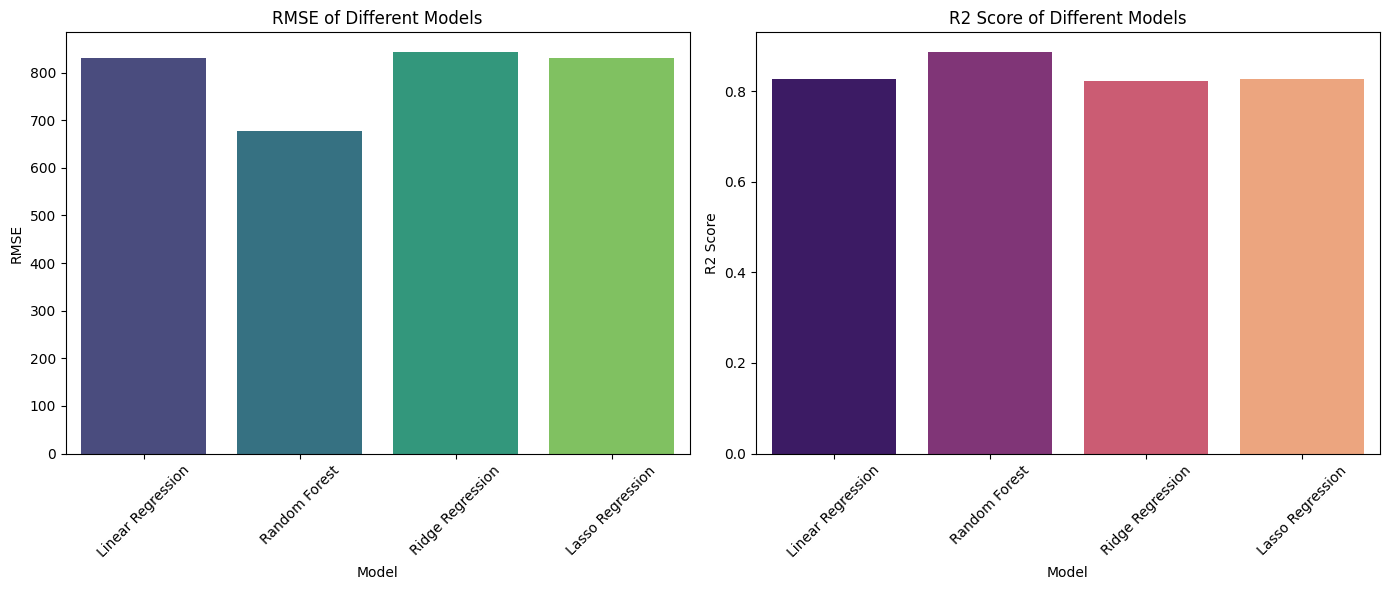

In [54]:
#Visualization: RMSE and R2 Score 
fig, axes = plt.subplots(1, 2, figsize=(14,6))

sns.barplot(ax=axes[0], x='Model', y='RMSE', hue='Model', data=comparison_df, palette='viridis', legend=False)
axes[0].set_title('RMSE of Different Models')
axes[0].set_ylabel('RMSE')
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(ax=axes[1], x='Model', y='R2 Score', hue='Model', data=comparison_df, palette='magma', legend=False)
axes[1].set_title('R2 Score of Different Models')
axes[1].set_ylabel('R2 Score')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [58]:
# Conclusion 
print("\nConclusion:")
print("Among all models, Random Forest Regressor performed the best in predicting the bike sharing demand, achieving the lowest RMSE and highest R2 Score.")
print("Further hyperparameter tuning and feature engineering can enhance model performance even more.")


Conclusion:
Among all models, Random Forest Regressor performed the best in predicting the bike sharing demand, achieving the lowest RMSE and highest R2 Score.
Further hyperparameter tuning and feature engineering can enhance model performance even more.



---
# Conclusion 

- Random Forest Regressor performed significantly better than Linear Regression for predicting bike-sharing demand.
- Feature scaling helped improve Linear Regression performance but wasn't necessary for Random Forest.
- Further model tuning (like hyperparameter optimization) could boost results even more.

Thanks for reading!   
**Project by Neelansh Goyal**
